In [57]:
# Import required packages
import pandas as pd
import numpy as np

In [58]:
# Reading the data
df = pd.read_csv('/train.csv')
titanic_details = df.copy()
titanic_details.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now since we have the dataframe, we will see how the data is column by column.

In [59]:
titanic_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It can be infered here that the cabin column has lot of null values

# **Data Analysis**

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

catplot can be used here to categorize the columns and plot them

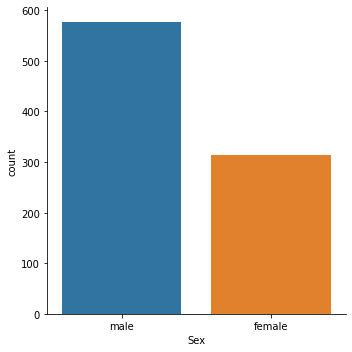

In [61]:
sns.catplot(x='Sex', data=titanic_details, kind='count')

Now let us see how many where males and females in different classes

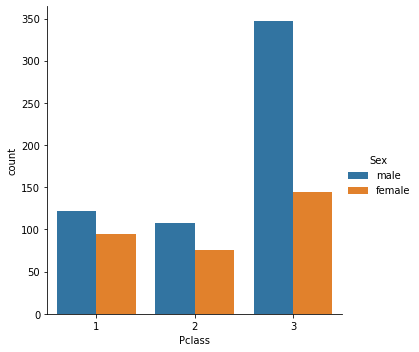

In [62]:
sns.catplot(x='Pclass', data=titanic_details, kind='count', hue='Sex')

This gives us an idea that more people who were in class 3 were men. And in class 1, it was almost same. This could be because it was family up there mostly.

In [63]:
def is_single(passengers):
  sibling, parent = passengers

  if (sibling + parent > 0):
    return False
  else:
    return True

In [64]:
titanic_details['Single'] = titanic_details[['SibSp', 'Parch']].apply(is_single, axis=1) # axis =1 since it is a column and not index
titanic_details.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


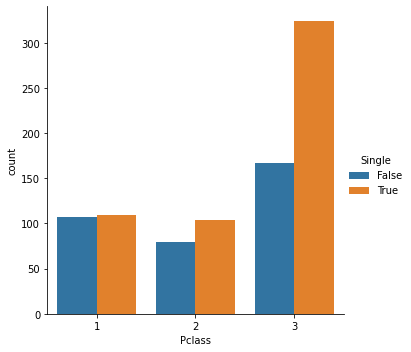

In [65]:
sns.catplot(x='Pclass', data=titanic_details, hue='Single', kind='count')

Yes as we predicted, in the class 1, the count of family is higher compared to rest of the classes. And, it is almost equal to the number of singles.

Since during a survival process, more priority is given to female and children. We will try to see if this is followed.

In [66]:
def is_child(passenger):
  age, sex = passenger

  # Let us consider that the person with age less than 16 to be a child
  if age < 16:
    return 'child'
  else:
    return sex

In [67]:
titanic_details['person'] = titanic_details[['Age', 'Sex']].apply(is_child, axis=1)
titanic_details.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Single,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,male


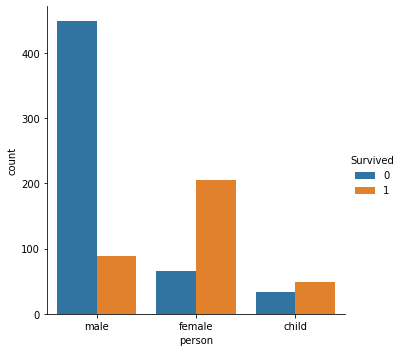

In [68]:
# Now let us see how many survived by categorizing into male, female and children
sns.catplot(x='person', data=titanic_details, kind='count', hue='Survived')

This confirms that priority were given to children and women for survival.